<a href="https://colab.research.google.com/github/JanakPatel09/The_Sparks_Foundation/blob/main/Task_2_Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author - Janak Patel**
## Task 2 - Prediction using Decision Tree Algorithm
## GRIP @ The Sparks Foundation

### For the given Iris dataset, I will create the Decision Tree Classifier and Visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [56]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Load the dataset

dataset = pd.read_csv('Iris.csv')

In [58]:
# Summarize the dataset

print(dataset.shape)
print(dataset.describe())
print(dataset.head())

(150, 6)
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa

In [59]:
# Input X and Output Y

X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

In [60]:
# Splitting Dataset into Train & Test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Text(0, 0.5, 'Score')

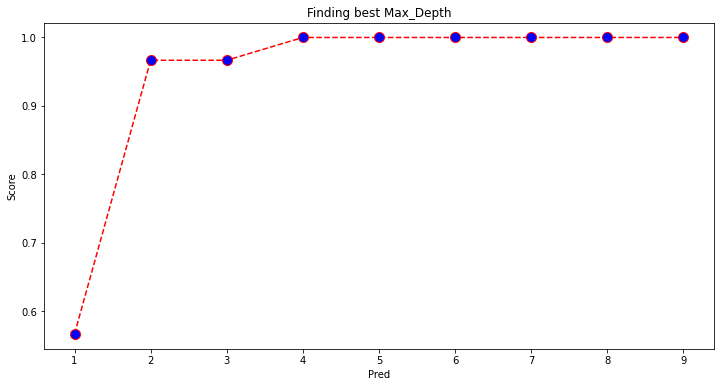

In [61]:
# Finding best max_depth Value

accuracy = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth = i, random_state = 0)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    score = accuracy_score(Y_test, pred)
    accuracy.append(score)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Finding best Max_Depth')
plt.xlabel('Pred')
plt.ylabel('Score')

In [62]:
# Training

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, random_state = 0)
model.fit(X_train,Y_train)
print('Training completed.')

Training completed.


In [63]:
# Prediction

y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']

In [64]:
# Accuracy Score

from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(Y_test, y_pred)*100))

Accuracy of the Model: 96.66666666666667%


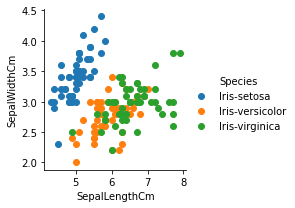

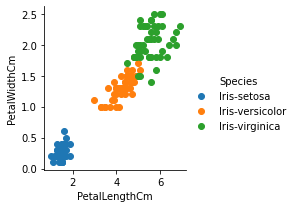

In [65]:
# Data Visualization
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(dataset,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(dataset,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()